In [1]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus
!pip install numpy
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./penguins.csv')

# Remove NaN
df.bill_length_mm = df.bill_length_mm.fillna(df.bill_length_mm.median())
df.bill_depth_mm = df.bill_depth_mm.fillna(df.bill_depth_mm.median())
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.median())
df.body_mass_g = df.body_mass_g.fillna(df.body_mass_g.median())
df = df.dropna()

class_list = []
for row in df.iterrows():
    class_list.append(f'{row[1][0]}_{row[1][6]}')

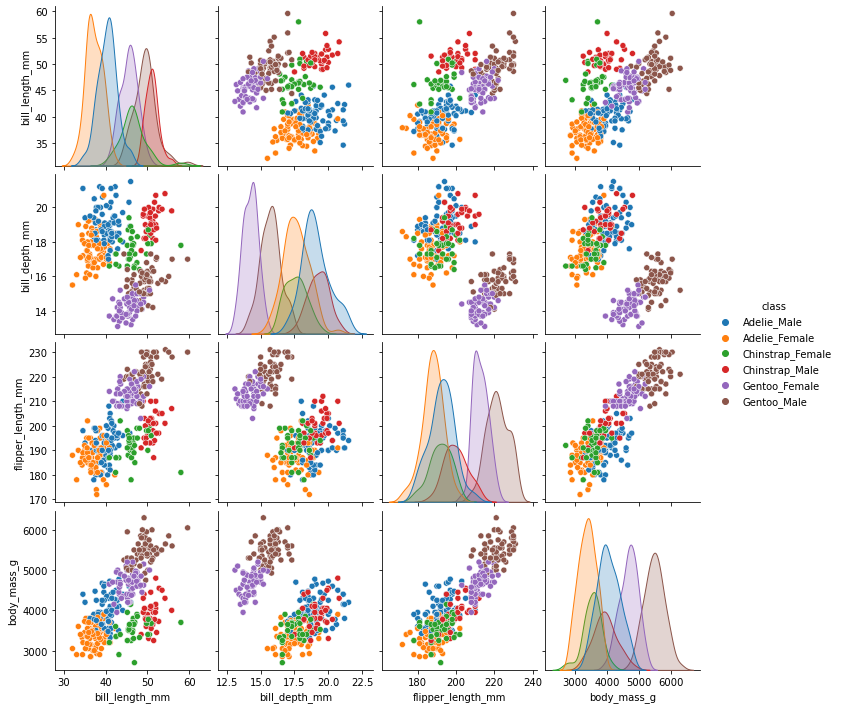

In [5]:
# add 'class' column to df
df['class'] = class_list
2.1
sb.pairplot(df, hue='class')
plt.show()

# Category -> Numeric
df['species'] = pd.Categorical(df.species, ordered=True, categories=['Adelie','Chinstrap','Gentoo']).codes+1
df['island'] = pd.Categorical(df.island, ordered=True, categories=['Torgersen','Biscoe','Dream']).codes+1
df['sex'] = pd.Categorical(df.sex, ordered=True, categories=['Male','Female']).codes+1

In [6]:
# 2.2 Predict using Naive Bayes 
X_axis = df[['bill_length_mm', 'bill_depth_mm']]
y_axis = df['class']

X_train, X_test, y_train, y_test = train_test_split(X_axis ,y_axis, train_size=0.8)
model = GaussianNB()                 
model.fit(X_train, y_train)              

y_model = model.predict(X_test)  
print(f'Prediction score: {model.score(X_test, y_test)*100}%')

Prediction score: 82.08955223880598%


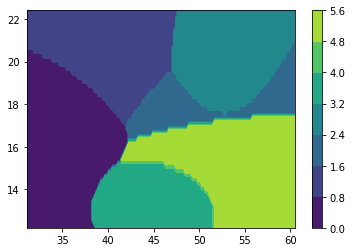

In [7]:
# 2.3 Filled contour plot:
class_dict = {1:'Adelie_Male',2:'Chinstrap_Male',3:'Gentoo_Male',4:'Adelie_Female',5:'Chinstrap_Female',6:'Gentoo_Female'}
col_list = df.columns

x_min, x_max = X_train.loc[:, 'bill_length_mm'].min()-1, X_train.loc[:, 'bill_length_mm'].max()+1
y_min, y_max = X_train.loc[:, 'bill_depth_mm'].min()-1, X_train.loc[:, 'bill_depth_mm'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

if len(model.classes_) == 3:
    plt.contourf(xx, yy, Z)
    plt.clim(0, 6)
    plt.colorbar()
else:
    plt.contourf(xx, yy, Z)
    plt.clim(0, 6)
    plt.colorbar()

fig = plt.gcf()
predictions = model.predict(X_axis)

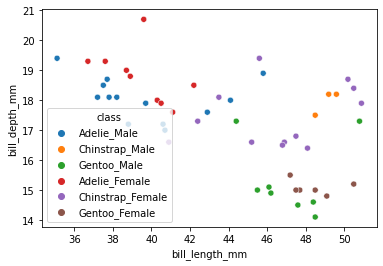

In [8]:
# 2.4
# Wrong predicted
wrongs = []
sp_i = 0
for i, col in enumerate(col_list):
    if col == 'class':
        sp_i = i
        break

val_t = df.values.tolist()
for i in range(len(df)):
    if predictions[i] != val_t[i][sp_i]:
        _t = val_t[i]
        _t[0] = class_dict[_t[0]]
        wrongs.append(val_t[i])

wrongs = pd.DataFrame(wrongs, columns=col_list)
sp = ['Adelie_Male','Chinstrap_Male','Gentoo_Male','Adelie_Female','Chinstrap_Female','Gentoo_Female','',''] 

sb.scatterplot(data=wrongs, x='bill_length_mm', y='bill_depth_mm', hue='class', hue_order=sp)
plt.show()

In [9]:
# 2.5 Classification report
print(metrics.classification_report(y_test, y_model))

                  precision    recall  f1-score   support

   Adelie_Female       0.86      0.92      0.89        13
     Adelie_Male       0.85      0.85      0.85        13
Chinstrap_Female       1.00      0.43      0.60         7
  Chinstrap_Male       0.89      1.00      0.94         8
   Gentoo_Female       0.80      0.86      0.83        14
     Gentoo_Male       0.69      0.75      0.72        12

        accuracy                           0.82        67
       macro avg       0.85      0.80      0.80        67
    weighted avg       0.83      0.82      0.81        67

